# EXERCISES

Answer to the following questions with matplotlib. Add chart titles and axis labels to all visualizations.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Let's load and analyze the diet dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Refocus/Colab Notebooks/Home Assignments/5.6.4 HA For Submission/Diet.csv')
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


**Problem 1:** Using a vertical bar chart, show the average weight (pre.weight vs. weight6weeks) for each diet type. Transfer the legend in the lower left corner.

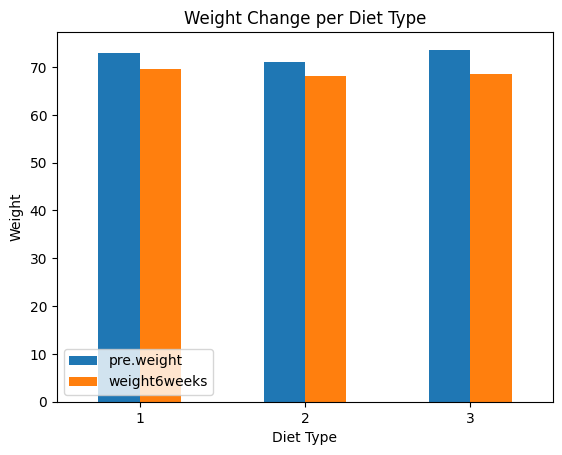

In [ ]:
df_weight_per_diet = df.groupby('Diet')[['pre.weight', 'weight6weeks']].mean()

df_weight_per_diet.plot(kind='bar')
plt.title('Weight Change per Diet Type')
plt.ylabel('Weight')
plt.xlabel('Diet Type')
plt.xticks(rotation=0)
plt.legend(loc='lower left')

**Problem 2:** In separate horizontal bar charts for males (gender=1) and females (gender=0), show the average change in weight (pre.weight vs. weight6weeks) per diet type.

Hint: ax is a parameter in df.plot -> set ax=ax[0] or ax=ax[1]

Text(0.5, 1.0, 'Weight Change per Diet Type for Males')

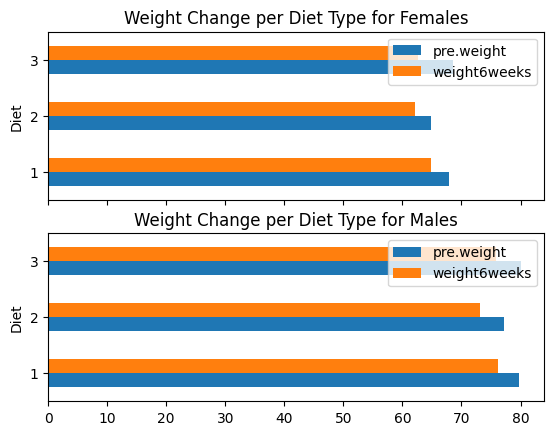

In [ ]:

df_weight_per_diet_male = df[df['gender'] == '1'].groupby('Diet')[['pre.weight', 'weight6weeks']].mean()
df_weight_per_diet_female = df[df['gender'] == '0'].groupby('Diet')[['pre.weight', 'weight6weeks']].mean()

fig, ax = plt.subplots(2, 1, sharex=True)
df_weight_per_diet_female.plot(kind='barh', ax= ax[0])
ax[0].set_title('Weight Change per Diet Type for Females')

df_weight_per_diet_male.plot(kind='barh', ax=ax[1])
ax[1].set_title('Weight Change per Diet Type for Males')


**Problem 3:** In a scatter plot, show the correlation between Height and pre.weight

Text(0.5, 1.0, 'pre.weight vs. Height')

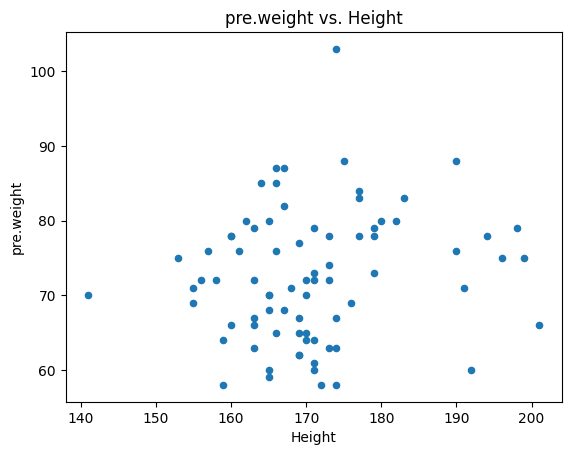

In [ ]:


df.plot(kind='scatter', x='Height', y='pre.weight')
plt.title('pre.weight vs. Height')

**Problem 4:** Using a stacked bar chart, show the change in weight for each gender (don't include blank gender). Transfer the legend in the lower left corner

Hint: add a weight_change column and plot it with weight6weeks.

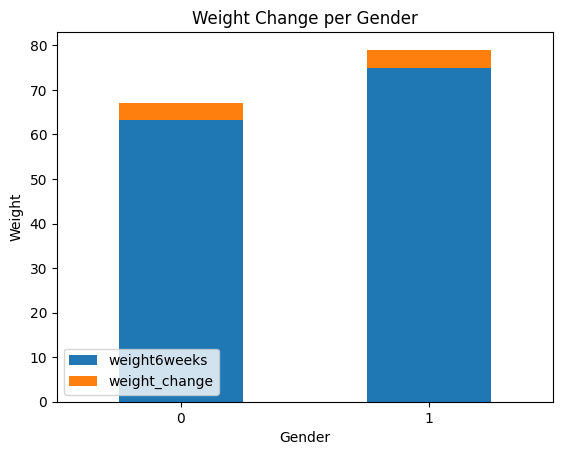

In [ ]:

df['weight_change'] = df['pre.weight'] - df['weight6weeks']
valid_genders = df[df['gender'].isin(['1', '0'])]
df_weight_per_gender = valid_genders.groupby('gender')[['weight6weeks', 'weight_change']].mean()

df_weight_per_gender.plot(kind='bar', stacked=True)
plt.ylabel('Weight')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(loc='lower left')

**Problem 5:** Using a line chart, show the counts of each people with the same age. Sort the index by Age. Add triangle markers and color them red.

Text(0.5, 0, 'Age')

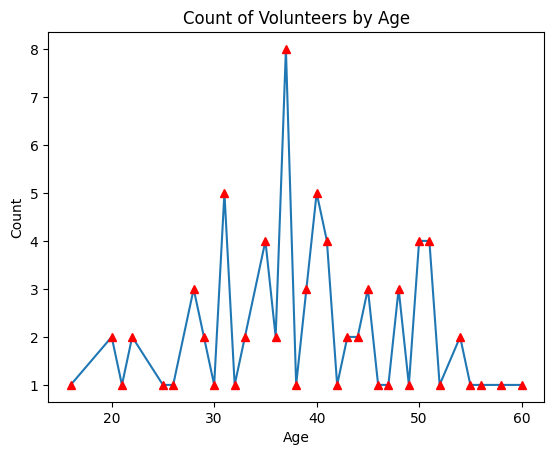

In [ ]:
age_count_df = df['Age'].value_counts()
sorted_age_df = age_count_df.sort_index()
sorted_age_df.plot(marker='^', markerfacecolor='red', markeredgecolor='red')
plt.title('Count of Volunteers by Age')
plt.ylabel('Count')
plt.xlabel('Age')